<a href="https://www.kaggle.com/code/ravindraog/healthcare-risk-analysis-cost-prediction?scriptVersionId=257545406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Healthcare Risk Analysis & Cost Prediction



**1. Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact

# Set visualization style
sns.set(style="whitegrid")


**2. Load Dataset**


In [2]:
file_path = "/kaggle/input/healthcare-dataset-csv-1-51-mb/healthcare_dataset.csv"
df = pd.read_csv(file_path)

**3. Initial Inspection**

In [3]:
print("Dataset Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())


Dataset Shape: (10000, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

None

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


**4. Data Cleaning**

In [4]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values per Column:\n", missing)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing values (example: fill Age with median)
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Convert dates to datetime
for col in ['Date of Admission', 'Discharge Date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Standardize categorical columns
categorical_cols = ['Gender', 'Blood Type', 'Admission Type', 'Insurance Provider', 'Medical Condition', 'Hospital']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

Missing Values per Column:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


/tmp/ipykernel_13/888037650.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**5. Exploratory Data Analysis (EDA)**

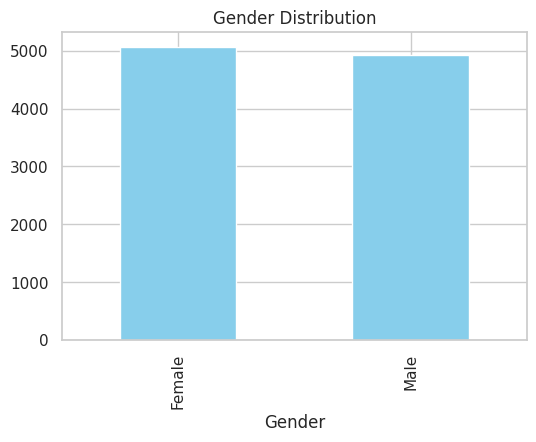

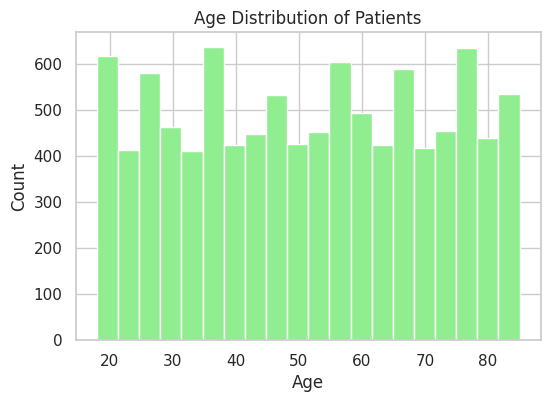

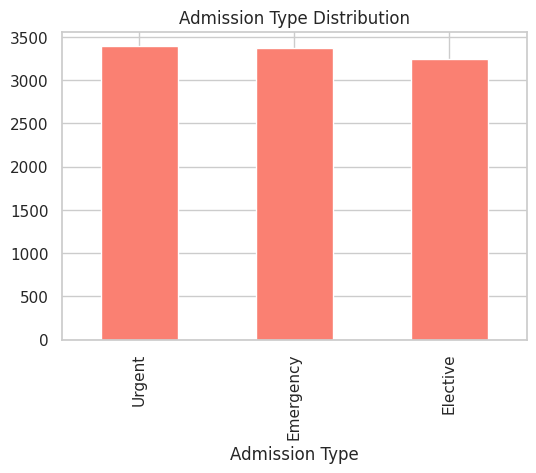

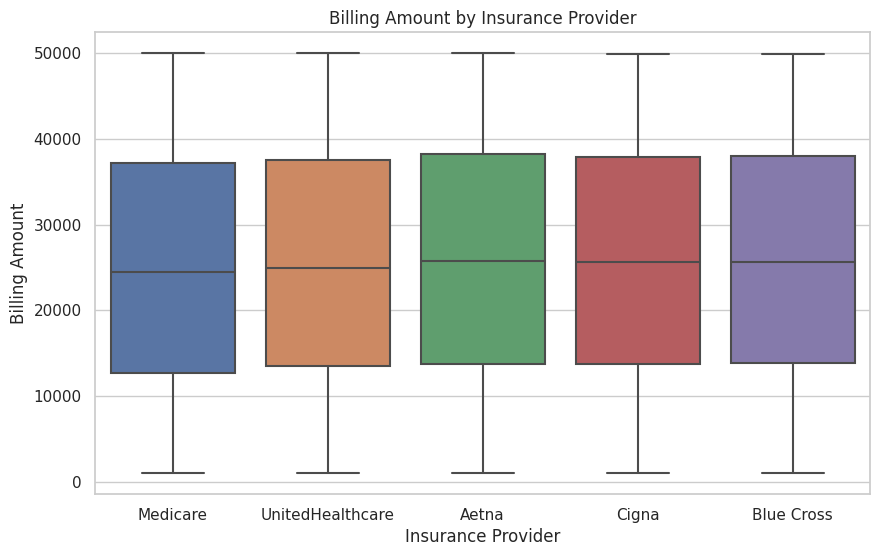

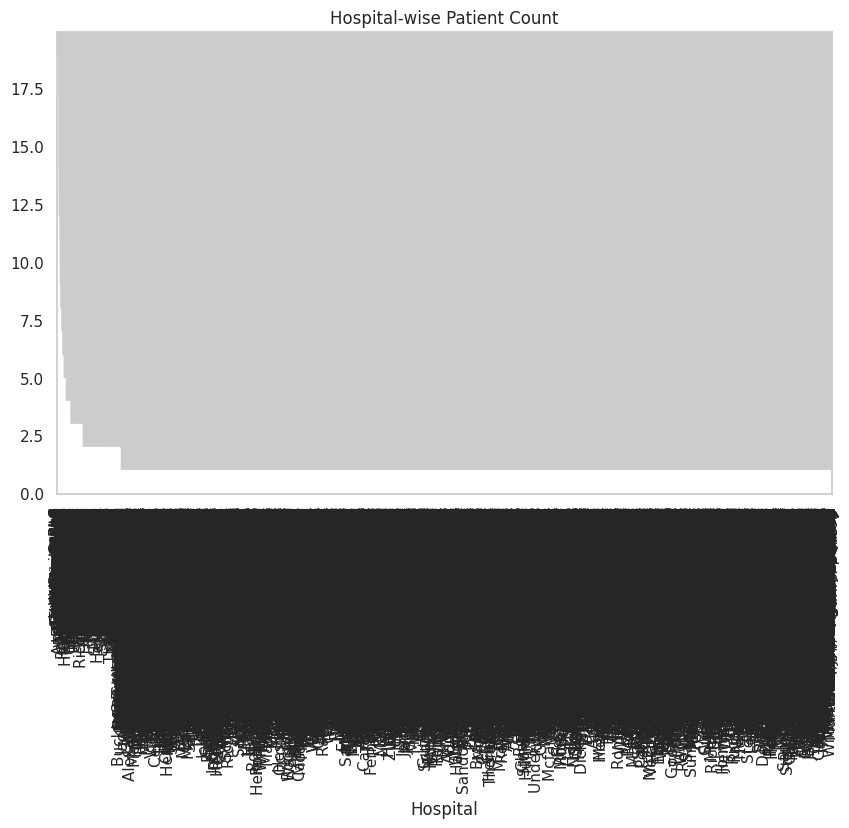

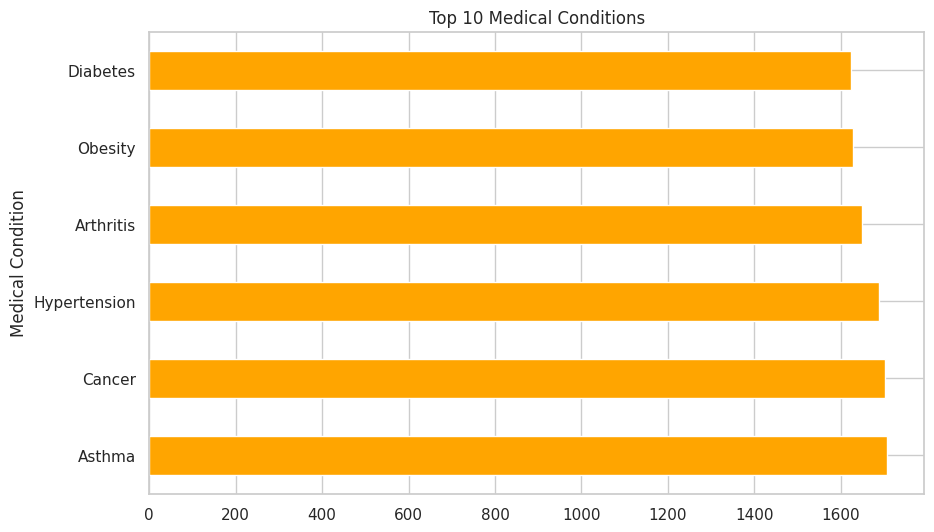

In [5]:
# Gender distribution
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='bar', color='skyblue', title='Gender Distribution')
plt.show()

# Age distribution
plt.figure(figsize=(6,4))
df['Age'].hist(bins=20, color='lightgreen')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Admission Type distribution
plt.figure(figsize=(6,4))
df['Admission Type'].value_counts().plot(kind='bar', color='salmon', title='Admission Type Distribution')
plt.show()

# Billing by Insurance Provider
plt.figure(figsize=(10,6))
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=df)
plt.title("Billing Amount by Insurance Provider")
plt.show()

# Hospital-wise patient load
plt.figure(figsize=(10,6))
df['Hospital'].value_counts().plot(kind='bar', color='violet', title='Hospital-wise Patient Count')
plt.show()

# Top Medical Conditions
plt.figure(figsize=(10,6))
df['Medical Condition'].value_counts().head(10).plot(kind='barh', color='orange', title='Top 10 Medical Conditions')
plt.show()


**6. Correlation Analysis**

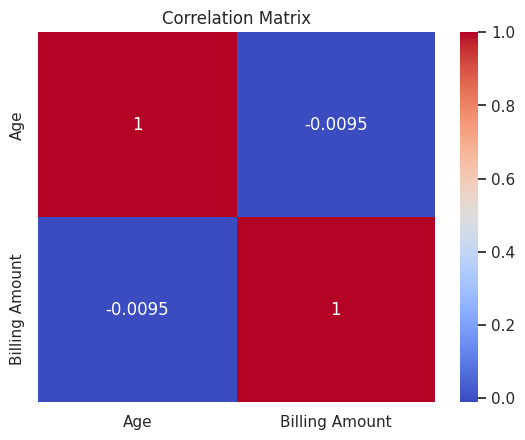

Insurance Provider,Aetna,Blue Cross,Cigna,Medicare,UnitedHealthcare
Medical Condition,,,,,
Arthritis,24694.858132,25989.515740,25189.873894,24206.381013,25704.428629
Asthma,24761.515983,25701.560294,26604.203083,25820.568227,24198.125815
Cancer,26333.940941,24382.770930,26437.599998,25118.720557,25222.992960
Diabetes,26703.077342,26599.036888,25496.295520,25468.553655,26003.702541
Hypertension,26420.830930,26614.290980,24146.228564,24164.166294,24708.016084
Obesity,26109.230890,24576.703308,26130.314831,25259.825969,26586.298041


In [6]:
# Numeric correlation
numeric_cols = ['Age', 'Billing Amount']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pivot table: Medical Condition vs Insurance Provider
pivot_table = pd.pivot_table(df, values='Billing Amount', index='Medical Condition',
                             columns='Insurance Provider', aggfunc='mean')
display(pivot_table.head(10))

**7. Interactive Dashboard (Kaggle Widgets)**

In [7]:
@interact
def show_insights(insurance=df['Insurance Provider'].unique()):
    temp = df[df['Insurance Provider'] == insurance]
    display(temp.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False).head(10))


interactive(children=(Dropdown(description='insurance', options=('Medicare', 'UnitedHealthcare', 'Aetna', 'Cig…

**8. Save Cleaned Dataset**

In [8]:
df.to_csv("/kaggle/working/cleaned_healthcare_data.csv", index=False)


# Cost Prediction

  Medical Condition  Actual Billing  Predicted Billing
0         Arthritis    25354.252412       25297.868565
1            Asthma    25856.089750       25191.478058
2            Cancer    26689.706632       25643.286955
3          Diabetes    26191.407031       25609.989048
4      Hypertension    24920.993463       25564.610202
5           Obesity    24870.717158       25771.658905


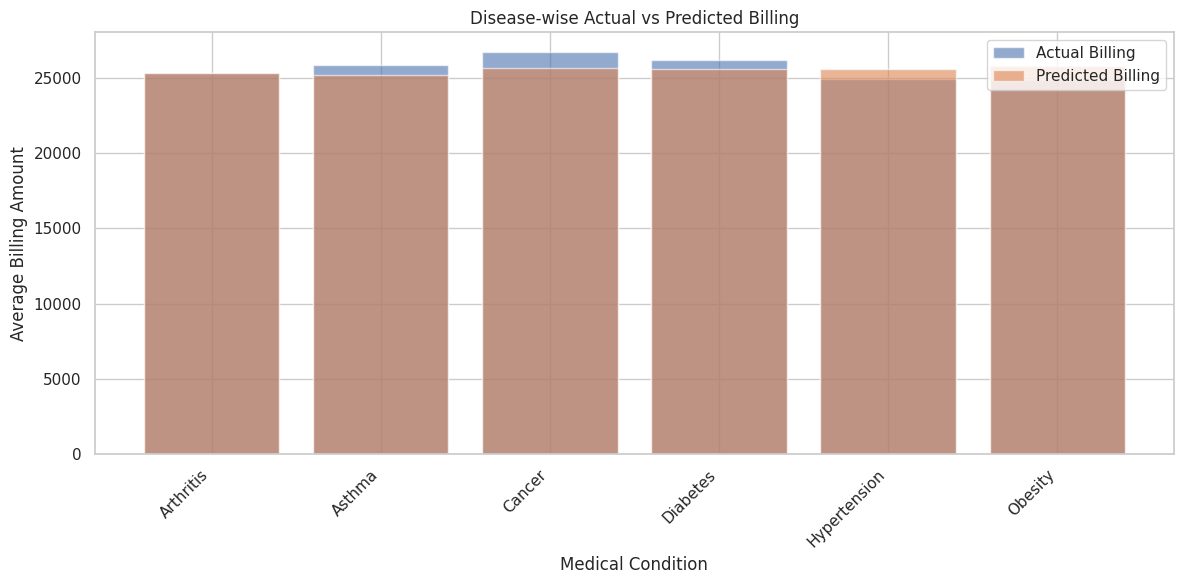

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("/kaggle/working/cleaned_healthcare_data.csv")

# Encode categorical variables
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 
                    'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le

# Features and target
X = df.drop(columns=['Billing Amount', 'Name', 'Date of Admission', 'Discharge Date', 'Room Number'])
y = df['Billing Amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Attach predictions back with original data
results = X_test.copy()
results['Actual Billing'] = y_test
results['Predicted Billing'] = y_pred

# Decode medical condition back from labels
results['Medical Condition'] = le_dict['Medical Condition'].inverse_transform(results['Medical Condition'])

# Group by medical condition and calculate mean actual vs predicted
grouped_results = results.groupby('Medical Condition')[['Actual Billing', 'Predicted Billing']].mean().reset_index()

# Show comparison
print(grouped_results)

# Plot disease-wise actual vs predicted billing
plt.figure(figsize=(12, 6))
plt.bar(grouped_results['Medical Condition'], grouped_results['Actual Billing'], alpha=0.6, label="Actual Billing")
plt.bar(grouped_results['Medical Condition'], grouped_results['Predicted Billing'], alpha=0.6, label="Predicted Billing")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing Amount")
plt.title("Disease-wise Actual vs Predicted Billing")
plt.legend()
plt.tight_layout()
plt.show()


# Tableau Dashboard[](https://drive.google.com/file/d/17LcXYDvbERF4VaHAyc_MDOa_Z595htmg/view?usp=drive_link)

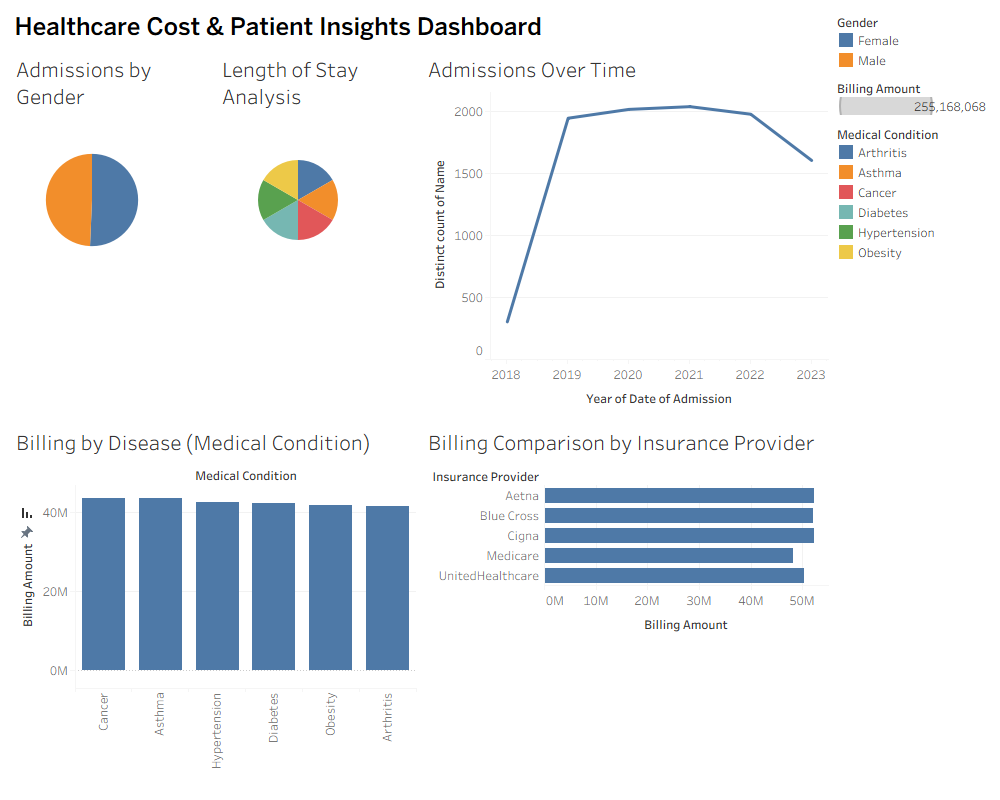
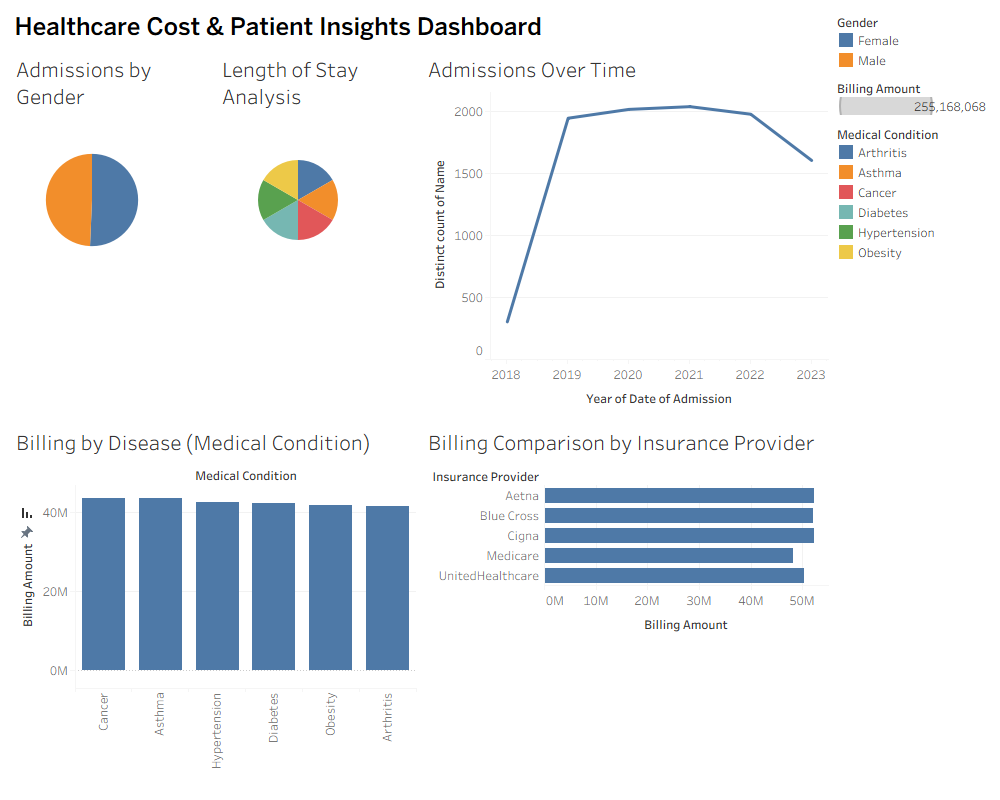
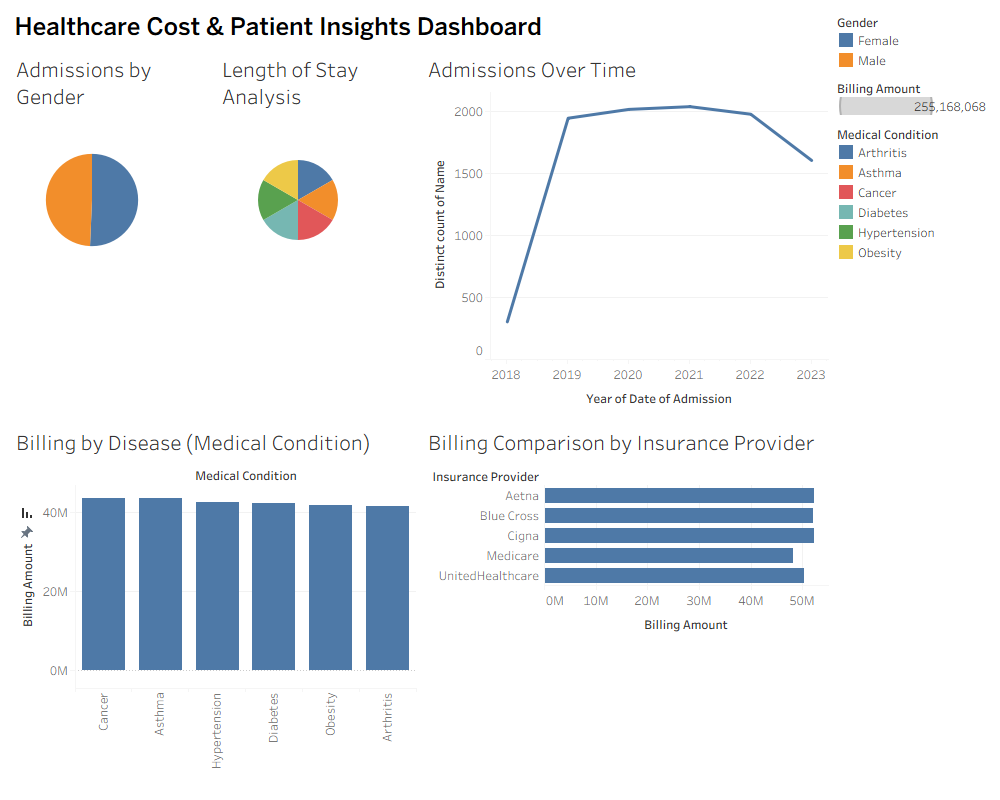